# 编程练习1：线性回归
第一章我们学习了线性回归，现在我们来做一些应用题。  
假设你是CEO，知道若干城市的人口及相应城市餐馆的利润，如何为新餐馆选择城市？  
这里的章节标题与英文习题`ex1.pdf`是对应的，便于查找。  
另外，这里我们假设你已经完成Octave的编程。因此主要探讨算法的Python实现，所以不会每题都做。

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

## 2. 单变量线性回归
### 2.1 数据读取及可视化
开始写代码前将数据可视化有助于理解数据。

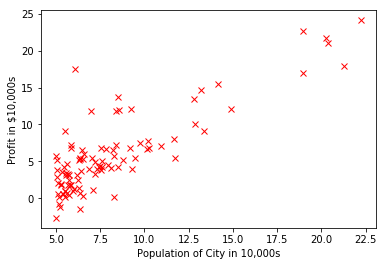

In [82]:
raw_data = np.loadtxt('ex1data1.txt', delimiter=',')
m = len(raw_data)
X = np.mat(list(zip(np.ones(m),raw_data[:,0])))
y = np.mat(raw_data[:,1]).reshape(m,1)
plt.plot(raw_data[:,0], raw_data[:,1], 'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### 2.2 梯度下降法
使用梯度下降法进行求解，关键是将theta的迭代公式用矩阵表达出来。  
一来可以使算法更清晰、提高效率；二来不存在单变量、多变量的问题，实现一次就够了。 
#### 2.2.1 迭代方程
要最小化的目标函数为：  
$$J(\theta)=\frac{1}{2m}\sum\limits_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$  
用矩阵表示为：  
$$J(\theta)=\frac{1}{2m}(X\theta-y)^T(X\theta-y)$$ 
迭代方程为：  
$$\theta_j:=\theta_j-\frac{\alpha}{m}\sum\limits_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$  
$$h_\theta(x)=\theta^Tx$$  
用矩阵表示为：  
$$\theta:=\theta-\frac{\alpha}{m}((X\theta-y)^TX)^T$$  
#### 2.2.3 代价函数

In [83]:
def J(X, y, theta):
    D = X*theta - y
    return (1/(2*len(y)) * (D.T*D))[0,0]

#### 2.2.4 梯度下降

In [84]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    for iter in range(0, num_iters):
        theta = theta - (alpha/m) * ((X*theta-y).T*X).T
        J_history.append(J(X,y,theta))
    return theta, J_history

### 2.3 求解

Initial J(theta): 32.0727338775
Final   J(theta): 4.48338825659
Final theta:
 [[-3.63029144]
 [ 1.16636235]]


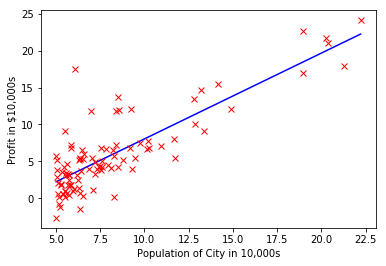

In [89]:
num_iters = 1500
alpha = 0.01
theta = np.mat(np.zeros(2)).reshape(2,1)
print('Initial J(theta): %s' % J(X,y,theta))
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
print('Final   J(theta): %s' % J(X,y,theta))
print('Final theta:\n %s' % theta)

xdata = [np.min(raw_data[:,0]), np.max(raw_data[:,0])]
ydata = [np.mat([1,xdata[0]])*theta, np.mat([1,xdata[1]])*theta]
fig,ax = plt.subplots()
ax.add_line(Line2D(xdata, ydata, color='blue'))
plt.plot(raw_data[:,0], raw_data[:,1], 'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### 2.4 可视化代价函数
为便于更好地理解代价函数，我们在给定X和y的情况下，以theta作为变量，将代价函数画出来。
Octave的代码里有一段注释：  
>Because of the way meshgrids work in the surf command, we need to transpose J_vals before calling surf, or else the axes will be flipped  

不知道为啥，在matplotlib中使用`plot_surface`一样需要进行此操作。

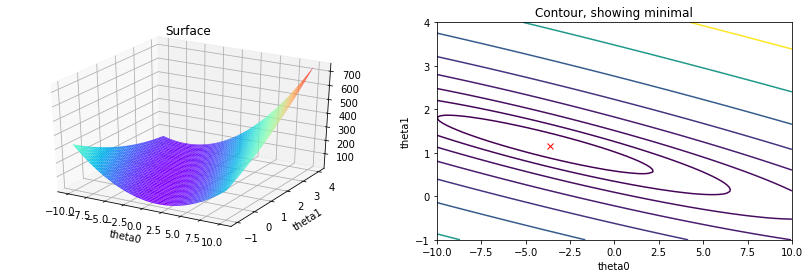

In [90]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(0,len(theta0_vals)):
    for j in range(0,len(theta1_vals)):
        J_vals[i][j] = J(X, y, np.mat([[theta0_vals[i]], [theta1_vals[j]]]))
fig = plt.figure(figsize=(14,4))
ax2 = fig.add_subplot(122)
ax2.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2,3,20))
ax2.plot(theta[0], theta[1], 'rx')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Contour, showing minimal')

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.rainbow)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

plt.show()

## 3. 多变量线性回归
假设知道房屋的面积（平方英尺）和卧室数量，如何估计售价？  
同样，我们将数据读取并可视化出来。

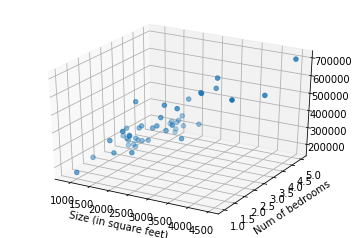

In [91]:
raw_data = np.loadtxt('ex1data2.txt', delimiter=',')
m = len(raw_data)
X = np.mat(list(zip(np.ones(m),raw_data[:,0],raw_data[:,1])))
y = np.mat(raw_data[:,2]).reshape(m,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(raw_data[:,0], raw_data[:,1], raw_data[:,2])
plt.xlabel('Size (in square feet)')
plt.ylabel('Num of bedrooms')
plt.show()

### 3.1 归一化
对X进行归一化有利于梯度下降法快速收敛。这里我们直接使用scikit-learn自带的归一化函数。

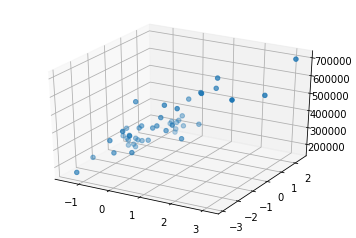

In [92]:
X = np.mat(scale(X))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y)
plt.show()

### 3.2 梯度下降法
由于之前我们已经是直接使用的矩阵形式写的梯度下降法，所以这里无需再写一次。  
#### 3.2.1 学习速率选择
这里我们选择不同的学习速率，比较代价函数的下降曲线有何不同。

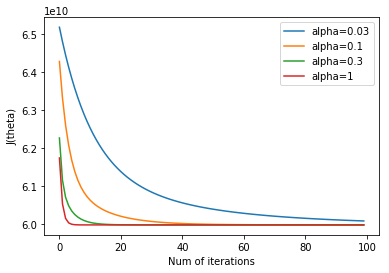

In [94]:
num_iters = 100
alphas = [0.03, 0.1, 0.3, 1]
for alpha in alphas:
    theta = np.mat(np.zeros(3)).reshape(3,1)
    theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
    plt.plot(J_history, label='alpha=%s'%alpha)
plt.xlabel('Num of iterations')
plt.ylabel('J(theta)')
plt.legend()
plt.show()

### 3.3 正则方程法
使用正则方程法可以直接算出最优解。

In [95]:
print('Gradient descent theta:\n %s'%theta)
theta = np.linalg.pinv(X.T*X) * X.T * y
print('Normal equation theta:\n %s'%theta)

Gradient descent theta:
 [[      0.        ]
 [ 109447.79646964]
 [  -6578.35485416]]
Normal equation theta:
 [[      0.        ]
 [ 109447.79646964]
 [  -6578.35485416]]
